# Feature Permutation

Feature Permutation is a method of determining the most valuable features in a model. We randomly shuffle one feature column and reevaluate the results. Performance drop means that the feature is important.

In [1]:
# importing dataset
import sys, os

# Project root: /Users/jaydenshi/Documents/Code/Projects/atp-forecaster
PROJECT_ROOT = os.path.abspath("../..")

# Add src/ to sys.path so `atp_forecaster` is importable
SRC_ROOT = os.path.join(PROJECT_ROOT, "src")
if SRC_ROOT not in sys.path:
    sys.path.insert(0, SRC_ROOT)

from atp_forecaster.data import load_training_data_xgb_v1

from sklearn.model_selection import train_test_split

X, y = load_training_data_xgb_v1()

print(X.columns)

test_size = 0.4
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=False)

Index(['draw_size', 'tourney_date', 'best_of', 'order', 'hth_win_p_a',
       'surface_Carpet', 'surface_Clay', 'surface_Grass', 'surface_Hard',
       'tourney_level_A', 'tourney_level_F', 'tourney_level_G',
       'tourney_level_M', 'hand_a_A', 'hand_a_L', 'hand_a_R', 'hand_a_U',
       'hand_b_A', 'hand_b_L', 'hand_b_R', 'hand_b_U', 'round_BR', 'round_ER',
       'round_F', 'round_QF', 'round_R128', 'round_R16', 'round_R32',
       'round_R64', 'round_RR', 'round_SF', 'elo_diff', 'elo_surface_diff',
       'p_ace_diff', 'p_df_diff', 'p_1stIn_diff', 'p_1stWon_diff',
       'p_2ndWon_diff', 'p_2ndWon_inPlay_diff', 'p_bpSaved_diff', 'p_rpw_diff',
       'p_retAceAgainst_diff', 'p_ret1stWon_diff', 'p_ret2ndWon_diff',
       'p_ret2ndWon_inPlay_diff', 'p_bpConv_diff', 'p_totalPtsWon_diff',
       'dominance_ratio_diff', 'age_diff', 'ht_diff', 'form_delta_diff',
       'elo_momentum_diff', 'log_rank_points_diff', 'log_total_matches_diff',
       'inv_rank_diff', 'log_hth_matches'],
      

In [2]:
import pickle
from sklearn.base import clone

with open("../../models/xgb_v1.pkl", "rb") as f:
    model = clone(pickle.load(f))

model.fit(x_train, y_train)

from sklearn.inspection import permutation_importance

r = permutation_importance(
    model, x_test, y_test,
    scoring="neg_log_loss",
    n_repeats=2
)

### Visualise

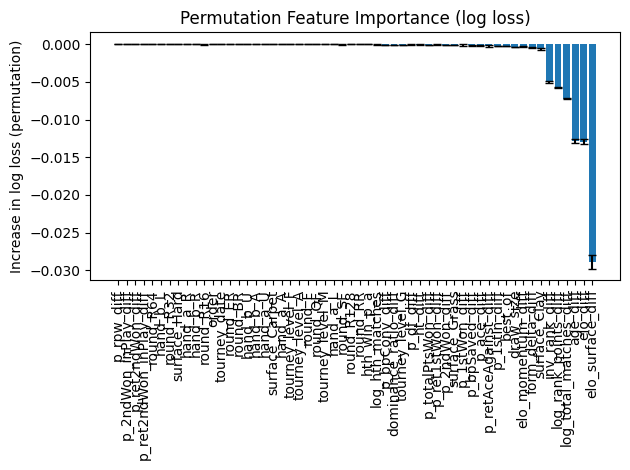

In [3]:
import numpy as np
import matplotlib.pyplot as plt

importances = -r.importances_mean          # negative because neg_log_loss
stds = r.importances_std
features = x_test.columns

idx = np.argsort(importances)[::-1]

plt.figure()
plt.bar(
    np.array(features)[idx],
    importances[idx],
    yerr=stds[idx],
    capsize=3
)
plt.xticks(rotation=90)
plt.ylabel("Increase in log loss (permutation)")
plt.title("Permutation Feature Importance (log loss)")
plt.tight_layout()
plt.show()
